In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Reading the dataset
dataset = pd.read_csv("advertising.csv")

In [3]:
dataset.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
dataset.shape

(200, 5)

In [5]:
dataset.isna().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [7]:
dataset.duplicated().any()

np.False_

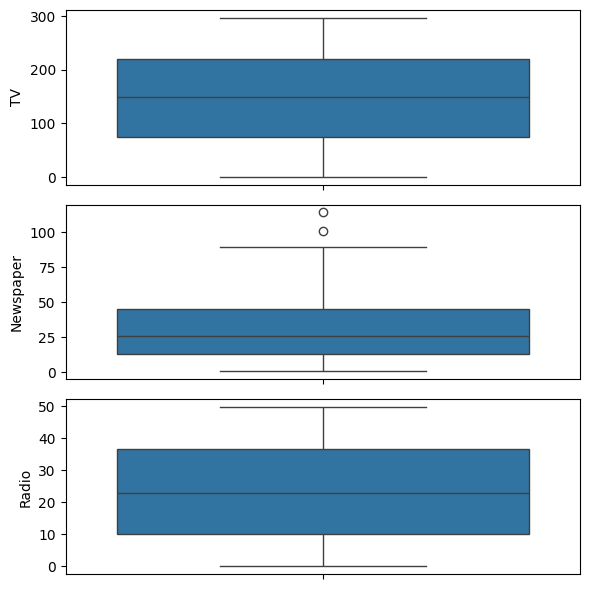

In [8]:
fig, axs = plt.subplots(3, figsize = (6,6))
plt1 = sns.boxplot(dataset['TV'], ax = axs[0])
plt2 = sns.boxplot(dataset['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(dataset['Radio'], ax = axs[2])
plt.tight_layout()

C:\Users\Nascave\AppData\Local\Temp\ipykernel_10396\475624845.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Sales']);


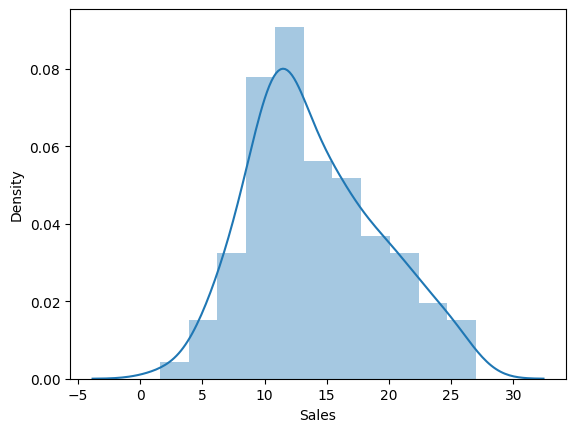

In [9]:
sns.distplot(dataset['Sales']);

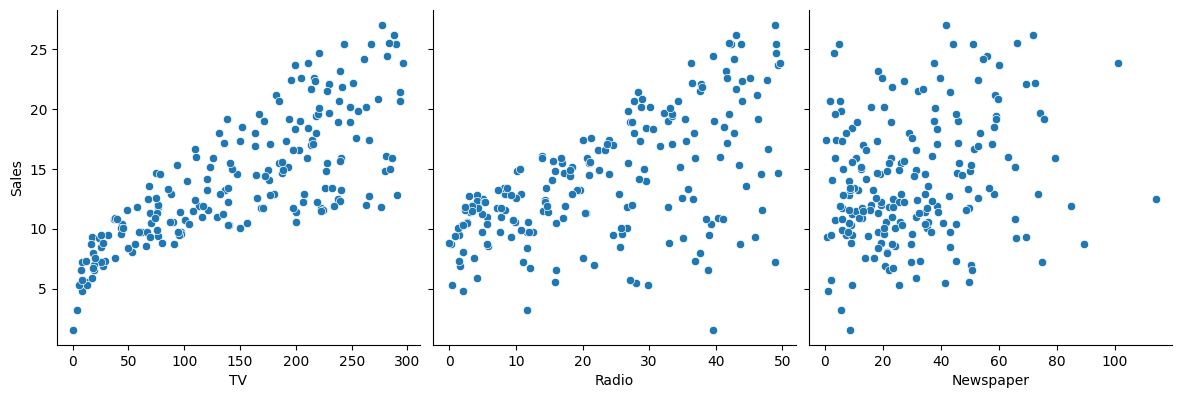

In [10]:
#how sales  are related with Tv, Radio and Newspaper
sns.pairplot(dataset, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

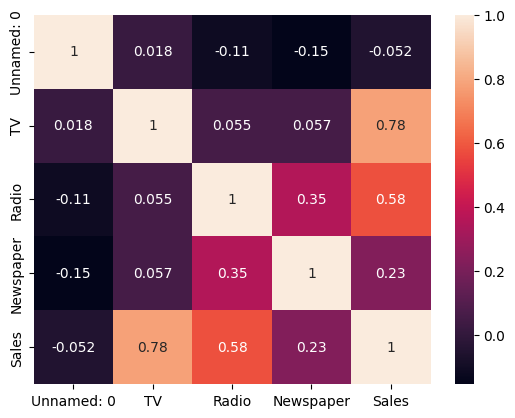

In [11]:
sns.heatmap(dataset.corr(), annot = True)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [13]:
x = dataset[['TV']]
y = dataset['Sales']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [15]:
Lr= LinearRegression()  
Lr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
print('Intercept: ', Lr.intercept_)
print('Coefficient:', Lr.coef_)

Intercept:  6.98966585741168
Coefficient: [0.04649736]


In [17]:
RegressionEquation = 'Intercept' + 'Coefficient' 
print('Regression Equation: Sales = 6.948 + 0.054 * TV')

Regression Equation: Sales = 6.948 + 0.054 * TV


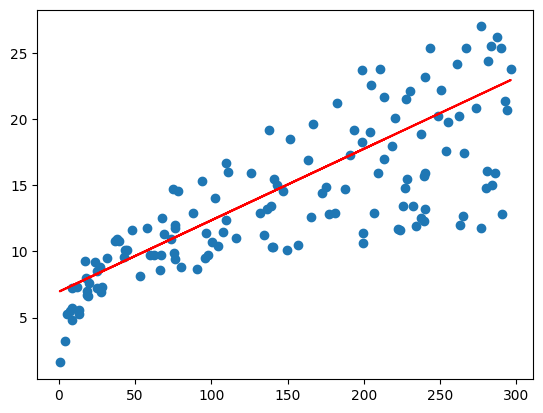

In [18]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.948 + 0.054 * x_train, 'r')
plt.show()

In [19]:
y_pred_Lr= Lr.predict(x_test)  
x_pred_Lr= Lr.predict(x_train)  

In [20]:
print("Prediction for test set: {}".format(y_pred_Lr))

Prediction for test set: [ 7.35234526 18.06533671 13.27610876 17.11214086 18.22807747 16.60531965
 13.4620982  16.17754395 17.05169429 17.07029323 12.4391563  17.66080969
  9.60281742 15.72186983 11.04423554 11.36971705 13.95032046 14.90351632
 14.59198401 12.23921766 16.97264878 13.00642408 16.07524976 15.21969836
 15.58702749 17.23303399 17.20978531 10.49091697 15.58702749 12.71349072
 10.1700852  10.19798361 12.61584627 15.74976825  9.31453379 12.59259759
 11.50920913 14.81982107 17.33067844 15.97295557 17.00519693 15.15925179
 14.63848137 17.14933874 12.57864838 11.16047894  7.77547122 18.55820871
 10.27237939  8.76586496 16.405381   14.95466341 10.4816175  13.08546959
 16.78665935  9.05879832  7.78942043  8.17999824 16.17754395 10.9744895 ]


In [21]:
#Actual value and the predicted value
L_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_Lr})
L_diff

,Actual value,Predicted value
126,6.6,7.352345
104,20.7,18.065337
99,17.2,13.276109
92,19.4,17.112141
111,21.8,18.228077
167,12.2,16.605320
116,12.2,13.462098
96,11.7,16.177544
52,22.6,17.051694
69,22.3,17.070293


In [22]:
#Predict for any value
Lr.predict([[37]])

C:\Users\Nascave\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8.71006813])

In [23]:
# print the R-squared value for the model
from sklearn.metrics import accuracy_score
print('R squared value of the model: {:.2f}'.format(Lr.score(x,y)*100))

R squared value of the model: 61.02


In [21]:
# 0 means the model is perfect. Therefore the value should be as close to 0 as possible
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_Lr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_Lr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_Lr))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 2.161984932672072
Mean Square Error: 7.975798532854851
Root Mean Square Error: 2.8241456288327007


In [ ]:
#2. Multiple Linear Regression

Multiple linear regression has one y and two or more x variables. It is an extension of Simple Linear regression as it takes more than one predictor variable to predict the response variable.

Multiple Linear Regression is one of the important regression algorithms which models the linear relationship between a single dependent continuous variable and more than one independent variable.

Assumptions for Multiple Linear Regression: 1. A linear relationship should exist between the Target and predictor variables. 2. The regression residuals must be normally distributed. 3. MLR assumes little or no multicollinearity (correlation between the independent variable) in data.

Formula: Y = β0 + β1X1 + β2X2 + β3X3 + ... + βnXn + e

Y = Dependent variable / Target variable
β0 = Intercept of the regression line 
β1, β2,..βn = Slope of the regression lime which tells whether the line is increasing or decreasing
X1, X2,..Xn = Independent variables / Predictor variables
e = Error
Equation: Sales = β0 + (β1 * TV) + (β2 * Radio) + (β3 * Newspaper)

In [24]:
#Setting the value for X and Y
x = dataset[['TV', 'Radio', 'Newspaper']]
y = dataset['Sales']

In [25]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=100)  

In [26]:
mlr= LinearRegression()  
mlr.fit(x_train, y_train) 

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [27]:
list(zip(x, mlr.coef_))

2.652789668879498


[('TV', np.float64(0.04542559602399794)),
 ('Radio', np.float64(0.18975772766893614)),
 ('Newspaper', np.float64(0.004603078953112072))]

In [28]:
#Predicting the Test and Train set result 
y_pred_mlr= mlr.predict(x_test)  
x_pred_mlr= mlr.predict(x_train)  

In [29]:
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [10.62160072 20.00625302 16.91850882 19.17040746 20.94974131 13.12284284
 11.80740696 12.32019766 20.57806782 20.95662688 10.79096475 19.54868702
  6.42403866 15.23133391  8.97226257  7.89897862 16.23599497 12.02636477
 17.09702178 11.26080277 16.97826292  9.75655721 20.82389762 17.20916742
 15.13816239 21.97290698 19.20181841 10.07501899 19.39017185 14.8673761
 14.36798893  7.55604543  9.96742165 14.76342565  7.20995576 13.60003295
  7.49088656 11.70865932 13.46091883 15.2229793  17.18088277 13.56738329
 14.30942267 13.72909849 11.88559349  8.77039705 12.1244102  19.20252289
  9.08376601  5.15367352 16.22852749 18.14111213 12.94835466 16.86274503
 17.86462435 12.33930625  4.3575739  11.25904494 16.11560622 13.56602169]


In [30]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff

,Actual value,Predicted value
126,6.6,10.621601
104,20.7,20.006253
99,17.2,16.918509
92,19.4,19.170407
111,21.8,20.949741
167,12.2,13.122843
116,12.2,11.807407
96,11.7,12.320198
52,22.6,20.578068
69,22.3,20.956627


In [31]:
#Predict for any value
mlr.predict([[55, 56, 67]])

C:\Users\Nascave\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([16.08603649])

In [34]:
# print the R-squared value for the model
print('R squared value of the model: {:.2f}'.format(mlr.score(x,y)*100))

R squared value of the model: 89.59


In [35]:
# 0 means the model is perfect. Therefore the value should be as close to 0 as possible
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 1.0638483124072025
Mean Square Error: 1.8506819941636963
Root Mean Square Error: 1.3603977338130553
